**Boundary conditions**

In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**1 - Flow over a cylinder**

In [3]:
def complex_potential_cylinder(z, a, Vinf, kappa):
  w = Vinf * (z + a**2 / z) + kappa / (2.0 * 1j *np.pi) * np.log(z)
  return w

In [4]:
def streamlines_around_cylinder(z, a, Vinf, kappa):
  Z = np.zeros_like(np.real(z))
  exterior = np.abs(z) > 1.0 # unit radius to work on normalized problem
  Z[exterior] = np.imag(complex_potential_cylinder(z[exterior], a, Vinf, kappa))
  interior = np.abs(z) <= 1.0
  Z[interior] = np.ma.masked
  return Z

We then trace the current lines.

In [5]:
N = 101
xx = np.linspace(-3, 3, N)

yy1 = np.linspace(-3, 3, N)
yy2 = np.linspace(-3, 3, N)
yy3 = np.linspace(-3, 3, N)
yy4 = np.linspace(-3, 3, N)

In [6]:
x, y1 = np.meshgrid(xx, yy1)
x, y2 = np.meshgrid(xx, yy2)
x, y3 = np.meshgrid(xx, yy3)
x, y4 = np.meshgrid(xx, yy4)

In [7]:
theta = np.linspace(0, 2.*np.pi, N-1)
unit_circle = [np.exp(1j * _) for _ in theta]

In [8]:
contours_levels_cyl = np.linspace(-.25*6.513, +.25*6.513, 11)

Text(0.5, 1.0, 'd)\\quad $\\kappa = -6\\pi a V_\\infty$')

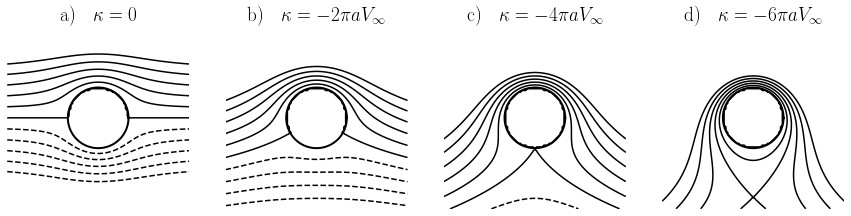

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(15,15))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)

a = Vinf = 1

# -----------------------------------------------------------------------------------------

ax[0].set_aspect('equal')
ax[0].contour(x, y1, streamlines_around_cylinder(x + 1j * y1, 1, 1, 0), 100, colors='black', levels=contours_levels_cyl)
ax[0].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=2)
ax[0].axis('off')
ax[0].set_title('a)\quad $\kappa = 0$')

# -----------------------------------------------------------------------------------------

ax[1].set_aspect('equal')
ax[1].contour(x, y2, streamlines_around_cylinder(x + 1j * y2, 1, 1, -2*a*np.pi*Vinf), 100, colors='black', levels=contours_levels_cyl)
ax[1].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=2)
ax[1].axis('off')
ax[1].set_title('b)\quad $\kappa = -2\pi a V_\infty$')

# -----------------------------------------------------------------------------------------

ax[2].set_aspect('equal')
ax[2].contour(x, y3, streamlines_around_cylinder(x + 1j * y3, 1, 1, -4*a*np.pi*Vinf), 100, colors='black', levels=contours_levels_cyl)
ax[2].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=2)
ax[2].axis('off')
ax[2].set_title('c)\quad $\kappa = -4\pi a V_\infty$')

# -----------------------------------------------------------------------------------------

ax[3].set_aspect('equal')
ax[3].contour(x, y4, streamlines_around_cylinder(x + 1j * y4, 1, 1, -6*a*np.pi*Vinf), 100, colors='black', levels=contours_levels_cyl)
ax[3].plot(np.real(unit_circle), np.imag(unit_circle), 'k', linewidth=2)
ax[3].axis('off')
ax[3].set_title('d)\quad $\kappa = -6\pi a V_\infty$')


### **2 - Flow over a plane plate in incidence**

In [11]:
def complex_potential_cylinder_with_incidence(zeta, a, Vinf, alpha, kappa):
  w = Vinf * (zeta *np.exp(- 1j * alpha) + a**2 / (zeta * np.exp(- 1j * alpha))) + kappa/(2. * 1j *np.pi)*np.log(zeta)
  return w

In [12]:
def streamlines_around_cylinder_with_incidence(zeta, a, Vinf, alpha, kappa):
  Z = np.zeros_like(np.real(zeta))
  exterior = np.abs(zeta) > 1.0 # unit radius to work on normalized problem
  Z[exterior] = np.imag(complex_potential_cylinder_with_incidence(zeta[exterior], a, Vinf, alpha, kappa))
  interior = np.abs(zeta) <= 1.0
  Z[interior] = np.ma.masked
  return Z

In [13]:
def streamlines_around_plate(z, a, Vinf, alpha, kappa):
  zeta = np.zeros_like(z)
  zeta = z + np.sqrt(z**2 - a**2)
  return streamlines_around_cylinder_with_incidence(zeta, a, Vinf, alpha, kappa)

We do as before, just we then replace z by zeta through relation $\zeta = z + \sqrt{(z^2 - a^2)}$

Text(0.5, 1.0, 'Flow around plate')

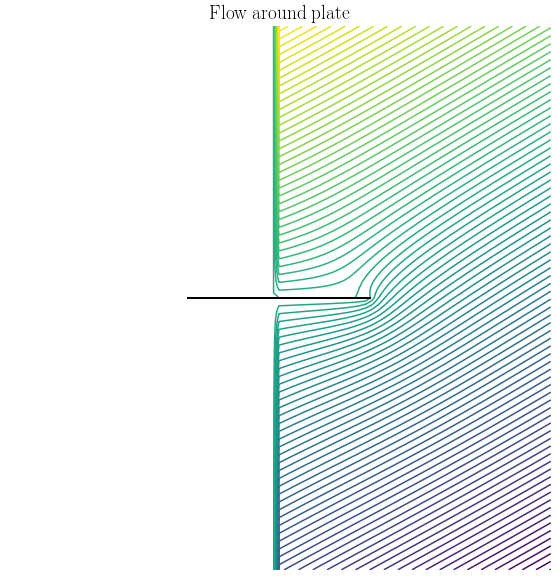

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax.set_aspect('equal')
ax.contour(x, y1, streamlines_around_plate(x + 1j * y1, 1, 1, np.pi/6., 0), 100)
ax.plot(np.real(unit_circle), 0*np.imag(unit_circle), 'k', linewidth=2) # plate as flat circle
ax.axis('off')
ax.set_title('Flow around plate')


Middle bar = cut bar

The issue here is that we need the symmetric with respect to middle bar ($\times-1$)

Text(0.5, 1.0, 'Square root')

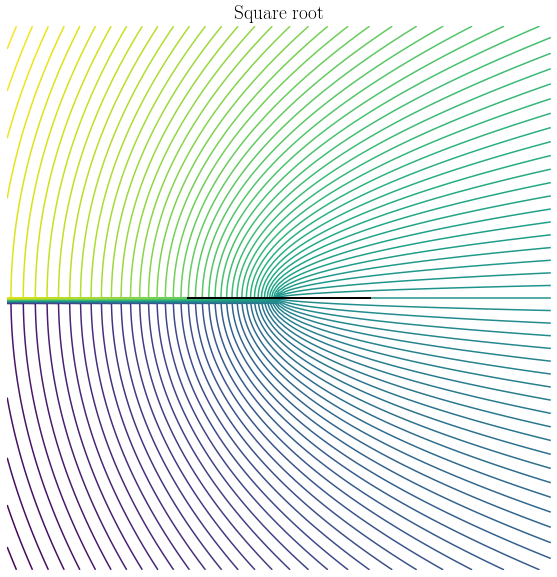

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax.set_aspect('equal')
ax.contour(x, y1, np.imag(np.sqrt(x + 1j*y1)), 100)
ax.plot(np.real(unit_circle), 0*np.imag(unit_circle), 'k', linewidth=2) # plate as flat circle
ax.axis('off')
ax.set_title('Square root')


In [16]:
def streamlines_around_plate(z, a, Vinf, alpha, kappa):
  zeta = np.zeros_like(z)
  left = np.real(z) < 0
  right = np.real(z) >= 0
  zeta[left]  = z[left] - np.sqrt(z[left]**2 - a**2)
  zeta[right] = z[right] + np.sqrt(z[right]**2 - a**2)
  return streamlines_around_cylinder_with_incidence(zeta, a, Vinf, alpha, kappa)

Text(0.5, 1.0, 'Flow around plate')

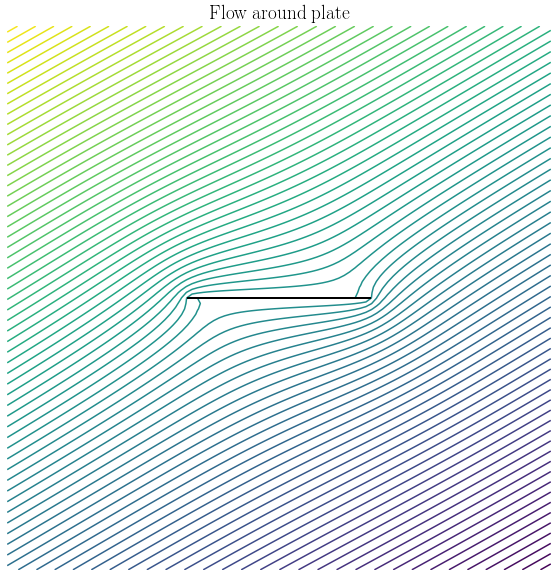

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 16)
ax.set_aspect('equal')
ax.contour(x, y1, streamlines_around_plate(x + 1j * y1, 1, 1, np.pi / 6., 0), 100)
ax.plot(np.real(unit_circle), 0*np.imag(unit_circle), 'k', linewidth=2) # plate as flat circle
ax.axis('off')
ax.set_title('Flow around plate')